### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지 분류해보자
- 이진분류의 개념을 정립해보자
- sklearn.datasets 제공하는 load_breast_cancer 사용해보자

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#### 데이터 살펴보기

In [19]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [20]:
# data - 번치객체 (데이터묶음)
# 키값들 확인
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
# data 접근해서 확인
data.data
# data['data'] : 딕셔너리[키]
# data들의 컬럼 정보 확인
data.feature_names
# 0 - 'malignant' 악성
# 1 - 'benign' 양성

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
# 정답 레이블
# target
data.target

# target 이름 정보
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [23]:
# 데이터 정보
print(data.DESCR)
#행 569, 열 30
print(data.data.shape)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 답, 문제 분리
#### train, test로 분리
- X 문제, y 답
- X_train, X_test, y_train, y_test
- train_test_split, 7:3, random 3

In [24]:
X = data.data
y = data.target

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state = 3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


#### 신경망 모델을 만들어서 예측해보자
1. 신경망 구조 설계(1.뼈대생성 2.층 정의) Sequential, Dense
2. 학습, 평가 방법 설정 compile
3. 학습 및 시각화 fit(epochs)
4. 평가 및 예측 evaluate, predict, predict_classes

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# 뼈대생성
model = Sequential()

# 입력층 + 중간층
# 뉴런개수 : 50, input_dim : 특성개수만큼, 활성화 : 시그모이드 ==> 입력층
# 뉴런개수 : 100, 활성화함수 ==> 중간층
# 뉴런개수 : 50, 활성화함수 ==> 중간층
# 뉴런개수 : 20, 활성화함수 ==> 중간층
model.add(Dense(units = 50, input_dim = 30, activation = 'sigmoid'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
# 출력층
# 이진분류 기억해서 입력해주기
model.add(Dense(units = 1, activation = 'sigmoid'))
# 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 12,741
Trainable params: 12,741
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 2. 모델 컴파일
model.compile(loss = 'binary_crossentropy', # 에러 측정(실제와 예측 차이 측정)
                     optimizer = 'adam', # 최적화 : 확률적 경사 하강법
                     metrics = ['accuracy'] ) # 평가 지표 : 정확도

In [30]:
# 3-1. 학습
h = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 0s 615us/step - loss: 0.6057 - accuracy: 0.7085
Epoch 2/200
13/13 [==============================] - 0s 614us/step - loss: 0.4636 - accuracy: 0.8869
Epoch 3/200
13/13 [==============================] - 0s 537us/step - loss: 0.3540 - accuracy: 0.8945
Epoch 4/200
13/13 [==============================] - 0s 614us/step - loss: 0.2931 - accuracy: 0.8945
Epoch 5/200
13/13 [==============================] - 0s 460us/step - loss: 0.2603 - accuracy: 0.8970
Epoch 6/200
13/13 [==============================] - 0s 537us/step - loss: 0.2452 - accuracy: 0.8945
Epoch 7/200
13/13 [==============================] - 0s 537us/step - loss: 0.2371 - accuracy: 0.9020
Epoch 8/200
13/13 [==============================] - 0s 460us/step - loss: 0.2335 - accuracy: 0.9045
Epoch 9/200
13/13 [==============================] - 0s 537us/step - loss: 0.2302 - accuracy: 0.8945
Epoch 10/200
13/13 [==============================] - 0s 537us/step - loss: 0.2256 - accura

13/13 [==============================] - 0s 535us/step - loss: 0.1894 - accuracy: 0.9171
Epoch 82/200
13/13 [==============================] - 0s 540us/step - loss: 0.1827 - accuracy: 0.9271
Epoch 83/200
13/13 [==============================] - 0s 539us/step - loss: 0.1897 - accuracy: 0.9296
Epoch 84/200
13/13 [==============================] - 0s 534us/step - loss: 0.1848 - accuracy: 0.9296
Epoch 85/200
13/13 [==============================] - 0s 537us/step - loss: 0.1729 - accuracy: 0.9271
Epoch 86/200
13/13 [==============================] - 0s 537us/step - loss: 0.1991 - accuracy: 0.9221
Epoch 87/200
13/13 [==============================] - 0s 537us/step - loss: 0.1945 - accuracy: 0.9296
Epoch 88/200
13/13 [==============================] - 0s 460us/step - loss: 0.1826 - accuracy: 0.9246
Epoch 89/200
13/13 [==============================] - 0s 460us/step - loss: 0.1713 - accuracy: 0.9271
Epoch 90/200
13/13 [==============================] - 0s 460us/step - loss: 0.1613 - accuracy: 

13/13 [==============================] - 0s 842us/step - loss: 0.1670 - accuracy: 0.9322
Epoch 161/200
13/13 [==============================] - 0s 691us/step - loss: 0.1536 - accuracy: 0.9322
Epoch 162/200
13/13 [==============================] - 0s 614us/step - loss: 0.1676 - accuracy: 0.9221
Epoch 163/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9372
Epoch 164/200
13/13 [==============================] - 0s 997us/step - loss: 0.1430 - accuracy: 0.9372
Epoch 165/200
13/13 [==============================] - 0s 687us/step - loss: 0.1369 - accuracy: 0.9548
Epoch 166/200
13/13 [==============================] - 0s 614us/step - loss: 0.1375 - accuracy: 0.9422
Epoch 167/200
13/13 [==============================] - 0s 923us/step - loss: 0.1368 - accuracy: 0.9372
Epoch 168/200
13/13 [==============================] - 0s 765us/step - loss: 0.1401 - accuracy: 0.9397
Epoch 169/200
13/13 [==============================] - 0s 613us/step - loss: 0.1498 - acc

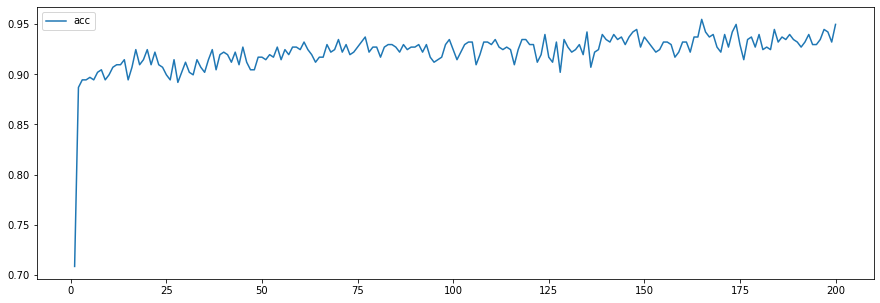

In [31]:
# 3-2. 시각화
plt.figure(figsize = (15,5))
plt.plot(range(1,201), h.history['accuracy'], label='acc')
plt.legend()
plt.show()

In [32]:
# 4-1. 평가
result = model.evaluate(X_test,y_test)
result

6/6 [==============================] - 0s 499us/step - loss: 0.2009 - accuracy: 0.9357


[0.20094257593154907, 0.9356725215911865]

In [33]:
# 4-2. 예측
model.predict(X_test)

array([[9.9795377e-01],
       [5.9825623e-01],
       [9.8902512e-01],
       [9.9741060e-01],
       [2.9364228e-04],
       [9.9736178e-01],
       [9.3616891e-01],
       [9.9745333e-01],
       [9.9562490e-01],
       [9.9797833e-01],
       [9.9803054e-01],
       [9.8861718e-01],
       [9.9714887e-01],
       [9.5962548e-01],
       [9.9802184e-01],
       [9.9790972e-01],
       [9.9621212e-01],
       [9.9782324e-01],
       [8.2224018e-05],
       [9.7491783e-01],
       [9.9782503e-01],
       [9.6542966e-01],
       [9.9778748e-01],
       [4.3955147e-03],
       [9.9598908e-01],
       [9.8888290e-01],
       [9.9804974e-01],
       [8.2205435e-05],
       [7.8404546e-03],
       [6.3514459e-01],
       [3.6671758e-04],
       [9.9804235e-01],
       [4.5429721e-01],
       [9.9796438e-01],
       [9.5951462e-01],
       [9.9063605e-01],
       [9.9793839e-01],
       [8.8451922e-01],
       [1.0606050e-03],
       [1.3619661e-04],
       [1.3637543e-04],
       [9.912661

In [34]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

#### 오차 역전파

- (1) w,b를 초기화(랜덤 - 필요따라서 Dense층에서 파라미터로 변경 가능)
- (2) 특성(x) 신경망에 입력해서 예측값을 계산
- (3) 오차 계산 error:실제값 - 예측값
- (4) 경사를 계산(미분)
    - 오차의 원인은 w와 b에 의해서 생김
    - w와 b가 오차에 얼만큼 영향을 주었는지 보기위해서는 미분 -> 경사값
    - e/w, e/b => w,b가 오차에 미친 영향
- (5) 미분값을 원래 w,b에 더해서 갱신
    - w + e/w, b + e/b
    - 미분값이 원래 w,b를 너무 크게 변화시키지 않도록 일정 비율만큼 변하도록 함
        : 학습률(r)
    - w + r*e/w, b + r*e/b
- (6) (2)-(5)번까지 epochs만큼 반복